In [84]:
import pandas as pd
import duckdb 
import matplotlib as plt


df= pd.read_excel(
    "../data/2024_kurser/inkomna-ansokningar-2024-for-kurser.xlsx"
)
df.head()

,Diarienummer,Anordnare namn,Utbildningsnamn,Sökt utbildningsområde,Sökt antal platser 2024,Sökt antal platser 2024 (start och avslut 2024),Sökt antal platser 2025,YH-poäng,Kommun,Län,FA-region,Antal kommuner,Antal län,Antal FA-regioner
0,MYH 2024/1000,Changemaker Educations AB,Futuregames Accessible Game Production,Data/IT,35,0,35,25,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3
1,MYH 2024/1001,Changemaker Educations AB,Futuregames Inclusive Game Development,Data/IT,35,0,35,25,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3
2,MYH 2024/1002,Båstads kommun Akademi Båstad,Ekosystemtjänster i praktiken,"Lantbruk, djurvård, trädgård, skog och fiske",25,0,0,50,Båstad,Skåne,Malmö-Lund,1,1,1
3,MYH 2024/1003,Båstads kommun Akademi Båstad,Hållbar dagvattenhantering i praktiken,"Lantbruk, djurvård, trädgård, skog och fiske",25,0,0,50,Båstad,Skåne,Malmö-Lund,1,1,1
4,MYH 2024/1004,Båstads kommun Akademi Båstad,Invasiva växter i utemiljöer,"Lantbruk, djurvård, trädgård, skog och fiske",40,40,0,25,Båstad,Skåne,Malmö-Lund,1,1,1


In [85]:

# Visa grundläggande information
print("🔹 Första raderna i data:")
print(df.head())

print("\n🔹 Kolumner och datatyper:")
print(df.dtypes)

print("\n🔹 Antal rader och kolumner:")
print(df.shape)

print("\n🔹 Saknade värden per kolumn:")
print(df.isnull().sum())

print("\n🔹 Beskrivande statistik för numeriska kolumner:")
print(df.describe())

print("\n🔹 Antal unika värden per kolumn:")
print(df.nunique())

# Undersök kategoriska kolumner (max 10 unika värden)
print("\n🔹 Distribution av kategoriska kolumner:")
for col in df.select_dtypes(include='object').columns:
    if df[col].nunique() <= 10:
        print(f"\nKolumn: {col}")
        print(df[col].value_counts())

# Undersök korrelation mellan numeriska kolumner
print("\n🔹 Korrelation mellan numeriska kolumner:")
print(df.corr(numeric_only=True))


🔹 Första raderna i data:
    Diarienummer                 Anordnare namn  \
0  MYH 2024/1000      Changemaker Educations AB   
1  MYH 2024/1001      Changemaker Educations AB   
2  MYH 2024/1002  Båstads kommun Akademi Båstad   
3  MYH 2024/1003  Båstads kommun Akademi Båstad   
4  MYH 2024/1004  Båstads kommun Akademi Båstad   

                           Utbildningsnamn  \
0  Futuregames Accessible Game Production    
1   Futuregames Inclusive Game Development   
2            Ekosystemtjänster i praktiken   
3   Hållbar dagvattenhantering i praktiken   
4             Invasiva växter i utemiljöer   

                         Sökt utbildningsområde  Sökt antal platser 2024  \
0                                       Data/IT                       35   
1                                       Data/IT                       35   
2  Lantbruk, djurvård, trädgård, skog och fiske                       25   
3  Lantbruk, djurvård, trädgård, skog och fiske                       25   
4  Lantbruk

In [86]:
# Exempel: filtrera på kurser som innehåller "Vård"
vård_df = df[df["Utbildningsnamn"].str.contains("Vård", case=False)]
print(vård_df.groupby("Utbildningsnamn")["Sökt antal platser 2024"].sum())

Utbildningsnamn
AKK och TAKK för yrkesverksamma inom skola, vård och omsorg                          40
Akutvård av häst                                                                     30
Beskärningshandledare och trädvård                                                   30
Chefsstöd inom vård och omsorg                                                       25
Digital spetskompetens inom hälsa, vård och omsorg (70 YHP)                          30
E-hälsa och informationssäkerhet för vårdadministrativ personal.                     30
E-hälsa, digitalisering och välfärdsteknik inom vård och omsorg                      50
E-hälsa, digitalisering och välfärdsteknik inom vård- och omsorg                     25
Existentiell hälsa i palliativ vård                                                  40
Fotsjukvård vid cytostatikabehandling                                                25
Fördjupning i palliativ omvårdnad                                                     0
Förändringsledni

In [87]:
# Exempel: visa sökande per kurs och kommun
print(df.groupby(["Utbildningsnamn", "Kommun"])["Sökt antal platser 2024"].sum().sort_values(ascending=False).head(20))


Utbildningsnamn                                                      Kommun                   
Välfärdsteknik inom vård och omsorg                                  Se "Lista flera kommuner"    100
Hållbarhetsanalytiker                                                Se "Lista flera kommuner"    100
Socialrätt och dokumentation                                         Se "Lista flera kommuner"    100
Hospitality och Service                                              Kungälv                      100
IT-säkerhet                                                          Göteborg                     100
Lic. Evidensbaserad Personlig Tränare (All-inclusive)                Se "Lista flera kommuner"     96
IT- och informationssäkerhet för administrativ personal              Se "Lista flera kommuner"     90
Psykisk ohälsa hos äldre                                             Se "Lista flera kommuner"     85
Sökmarknadsföring - nya förutsättningar för marknadsförare           Stockholm           

In [88]:
# ====== SÖKT ANTAL PLATSER – 2024 ======

print("\n🔹 Topp 10 mest sökta utbildningar (2024):")
print(df.groupby("Utbildningsnamn")["Sökt antal platser 2024"].sum().sort_values(ascending=False).head(10))

print("\n🔹 Topp 10 kommuner efter totalt sökt antal platser (2024):")
print(df.groupby("Kommun")["Sökt antal platser 2024"].sum().sort_values(ascending=False).head(10))



🔹 Topp 10 mest sökta utbildningar (2024):
Utbildningsnamn
Välfärdsteknik inom vård och omsorg                        160
Palliativ vård                                             160
IT-säkerhet                                                100
Hållbarhetsanalytiker                                      100
Socialrätt och dokumentation                               100
TypeScript                                                 100
Hospitality och Service                                    100
Lic. Evidensbaserad Personlig Tränare (All-inclusive)       96
UX-writing                                                  90
IT- och informationssäkerhet för administrativ personal     90
Name: Sökt antal platser 2024, dtype: int64

🔹 Topp 10 kommuner efter totalt sökt antal platser (2024):
Kommun
Stockholm                    6686
Se "Lista flera kommuner"    6134
Göteborg                     3068
Malmö                        2102
Solna                         846
Örebro                        

In [89]:
# ====== BELÄGGNING ÖVER TID (2024 + 2025) ======

print("\n🔹 Utbildningar med störst total platsansökan 2024+2025:")
df["Total ansökan 2024+2025"] = df["Sökt antal platser 2024"].fillna(0) + df["Sökt antal platser 2025"].fillna(0)
print(df.groupby("Utbildningsnamn")["Total ansökan 2024+2025"].sum().sort_values(ascending=False).head(10))


🔹 Utbildningar med störst total platsansökan 2024+2025:
Utbildningsnamn
Palliativ vård                                           310
TypeScript                                               280
UX-writing                                               250
DevOps för utvecklare                                    225
Välfärdsteknik inom vård och omsorg                      220
Hållbarhetsanalytiker                                    200
IT-säkerhet                                              200
Hospitality och Service                                  200
Säkerhetsskyddssamordning                                200
Lic. Evidensbaserad Personlig Tränare (All-inclusive)    192
Name: Total ansökan 2024+2025, dtype: int64


In [90]:
# ====== LÄN OCH REGIONER ======

print("\n🔹 Sökt antal platser per län (2024):")
print(df.groupby("Län")["Sökt antal platser 2024"].sum().sort_values(ascending=False))

print("\n🔹 Sökt antal platser per FA-region (2024):")
print(df.groupby("FA-region")["Sökt antal platser 2024"].sum().sort_values(ascending=False))


🔹 Sökt antal platser per län (2024):
Län
Stockholm                    9167
Se "Lista flera kommuner"    6134
Västra Götaland              4383
Skåne                        2974
Örebro                        995
Östergötland                  490
Jönköping                     490
Västmanland                   485
Uppsala                       425
Västerbotten                  425
Norrbotten                    375
Kronoberg                     365
Södermanland                  364
Gävleborg                     280
Blekinge                      260
Västernorrland                230
Värmland                      218
Jämtland                       60
Dalarna                        59
Halland                        50
Kalmar                         26
Name: Sökt antal platser 2024, dtype: int64

🔹 Sökt antal platser per FA-region (2024):
FA-region
Stockholm                    9592
Se "Lista flera kommuner"    6134
Göteborg                     3534
Malmö-Lund                   2934
Örebro    

In [91]:
# ====== FLERA GEOGRAFIER PER UTBILDNING ======

print("\n🔹 Utbildningar som täcker flest kommuner:")
print(df[["Utbildningsnamn", "Antal kommuner"]].sort_values("Antal kommuner", ascending=False).drop_duplicates("Utbildningsnamn").head(10))

print("\n🔹 Utbildningar som täcker flest län:")
print(df[["Utbildningsnamn", "Antal län"]].sort_values("Antal län", ascending=False).drop_duplicates("Utbildningsnamn").head(10))


🔹 Utbildningar som täcker flest kommuner:
                                       Utbildningsnamn  Antal kommuner
462                    Ventilation Mätning/Injustering               5
19                               Missbruk och beroende               5
250                Välfärdsteknik inom vård och omsorg               5
249                      Symtomlindring palliativ vård               5
248                      Socialrätt och dokumentation                5
388  Cirkulära mötesplatser som affärs- och verksam...               5
445                                     Batterilagring               5
224               Kvalitetssäkring inom socialt arbete               5
556       Practical AI: Tools for Workplace Efficiency               5
219                             Funktionsnedsättningar               5

🔹 Utbildningar som täcker flest län:
                                       Utbildningsnamn  Antal län
14                  Psykisk hälsa och suicidprevention          5
224   

In [92]:
# ====== EXEMPEL: FILTRERING AV SPECIFIKA OMRÅDEN ======

print("\n🔹 Alla vårdrelaterade utbildningar (filtrerat via utbildningsområde):")
vard_df = df[df["Sökt utbildningsområde"].str.contains("vård", case=False, na=False)]
print(vard_df[["Utbildningsnamn", "Sökt antal platser 2024"]].sort_values("Sökt antal platser 2024", ascending=False).head(10))


🔹 Alla vårdrelaterade utbildningar (filtrerat via utbildningsområde):
                                       Utbildningsnamn  \
248                      Socialrätt och dokumentation    
250                Välfärdsteknik inom vård och omsorg   
712  Lic. Evidensbaserad Personlig Tränare (All-inc...   
398                      Hot och våld på arbetsplatsen   
102                               Våld i nära relation   
194           Förebyggande arbete mot gängkriminalitet   
209                               Självskadeprevention   
18            Funktionsnedsättningar och samsjuklighet   
760                       NPF inriktning barn och unga   
196  Munhälsa och måltidsrutiner vid kognitiva svår...   

     Sökt antal platser 2024  
248                      100  
250                      100  
712                       96  
398                       80  
102                       75  
194                       70  
209                       70  
18                        70  
760        

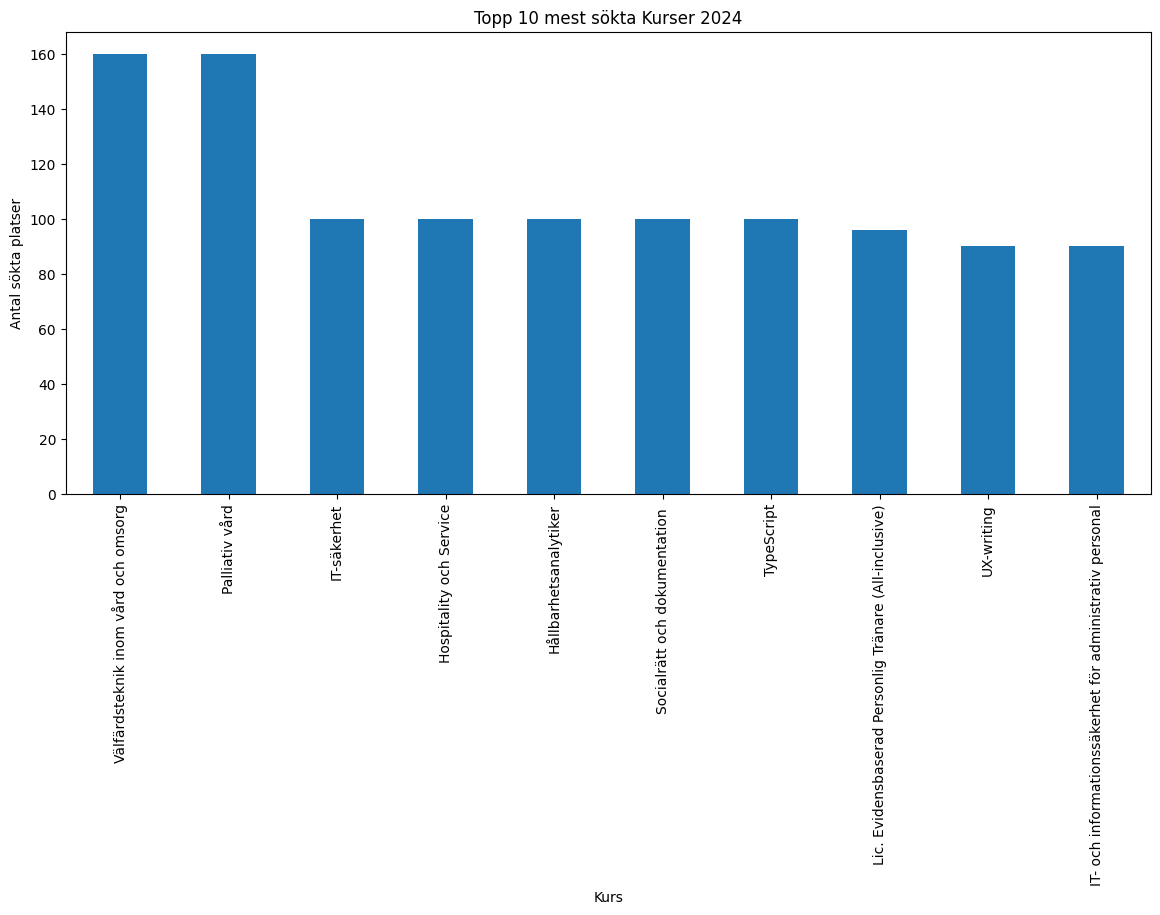

In [93]:
# DuckDB-query för att summera sökta platser per utbildning
df_utbildning_sökta = duckdb.query(
    """
    SELECT "Utbildningsnamn" AS Kurs, SUM("Sökt antal platser 2024") AS Antal_sökande
    FROM df
    GROUP BY "Utbildningsnamn"
    ORDER BY Antal_sökande DESC
    LIMIT 10
    """
).df().set_index("Kurs")


# Plotta stapeldiagram
ax = df_utbildning_sökta.plot(
    kind="bar",
    y="Antal_sökande",
    title="Topp 10 mest sökta Kurser 2024",
    ylabel="Antal sökta platser",
    figsize=(14, 6),
)

ax.legend().remove()

                           Antal_sökande
Kommun                                  
Stockholm                         6686.0
Se "Lista flera kommuner"         6134.0
Göteborg                          3068.0
Malmö                             2102.0
Solna                              846.0


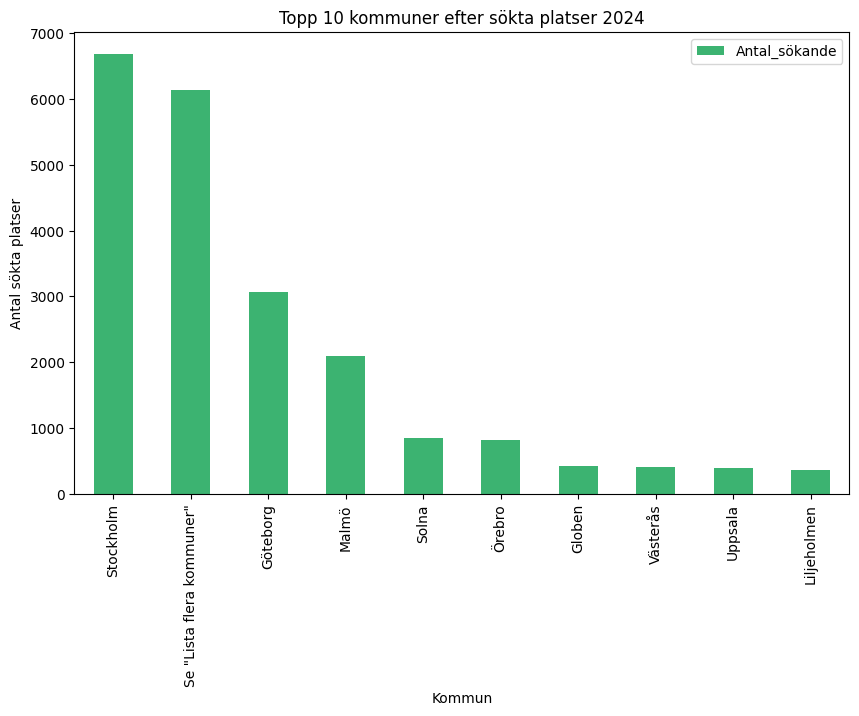

In [94]:
df_top_kommuner = duckdb.query(
    """
    SELECT Kommun, SUM("Sökt antal platser 2024") AS Antal_sökande
    FROM df
    GROUP BY Kommun
    ORDER BY Antal_sökande DESC
    LIMIT 10
    """
).df().set_index("Kommun")

print(df_top_kommuner.head())

ax = df_top_kommuner.plot(
    kind="bar",
    y="Antal_sökande",
    title="Topp 10 kommuner efter sökta platser 2024",
    ylabel="Antal sökta platser",
    figsize=(10, 6),
    color="mediumseagreen",
)



In [ ]:
df_top_områden = duckdb.query(
    """
    SELECT "Sökt utbildningsområde" AS Område, SUM("Sökt antal platser 2024") AS Antal_sökande
    FROM df
    GROUP BY Område
    ORDER BY Antal_sökande DESC
    LIMIT 10
    """
).df().set_index("Område")

print(df_top_områden.head())

ax = df_top_områden.plot(
    kind="bar",
    y="Antal_sökande",
    title="Topp 10 utbildningsområden 2024",
    ylabel="Antal sökta platser",
    figsize=(10, 6),
    color="tomato",
)



                                 Antal_sökande
Anordnare                                     
YH Akademin AB                          1500.0
IHM Business School AB Göteborg         1450.0
Medieinstitutet i Sverige AB            1047.0
TUC Sweden AB - Yrkeshögskola            830.0
Nackademin AB                            671.0


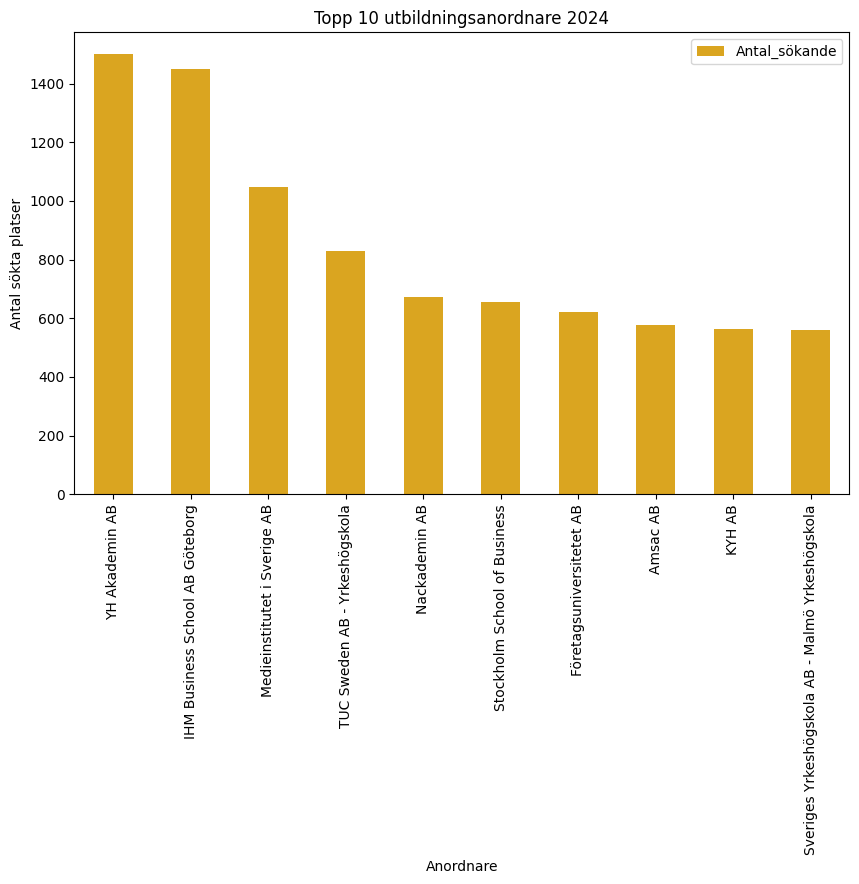

In [97]:
df_top_anordnare = duckdb.query(
    """
    SELECT "Anordnare namn" AS Anordnare, SUM("Sökt antal platser 2024") AS Antal_sökande
    FROM df
    GROUP BY Anordnare
    ORDER BY Antal_sökande DESC
    LIMIT 10
    """
).df().set_index("Anordnare")

print(df_top_anordnare.head())

ax = df_top_anordnare.plot(
    kind="bar",
    y="Antal_sökande",
    title="Topp 10 utbildningsanordnare 2024",
    ylabel="Antal sökta platser",
    figsize=(10, 6),
    color="goldenrod",
)
